#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

#### Loading the dataset

In [2]:
transaction = pd.read_excel("D:\Downloads\data\Transaction.xlsx")
customer_address = pd.read_excel("D:\Downloads\data\CustomerAddress.xlsx")
customer_demographic = pd.read_excel("D:\Downloads\data\CustomerDemographic.xlsx")

# Data Insights

*Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation.*

*Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend how these 1000 new customers should be targeted to drive the most value for the organisation.*

### Data Preparation

In [24]:
# Merging Transaction data and Customer Address data
merged_df = pd.merge(customer_address, customer_demographic, on='customer_id')

In [25]:
df = pd.merge(merged_df, transaction, on='customer_id')

In [26]:
display(df.head())
print("size :",df.shape)  

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


size : (19968, 30)


### Feature Engineering

In [27]:
df['first_name'] = df['first_name'].fillna(' ')
df['last_name'] = df['last_name'].fillna(' ')
df['full_name'] = df['first_name'] + ' ' + df['last_name']

In [28]:
# calculating the present age
from datetime import datetime

date_of_birth_column = df['DOB']

current_date = pd.to_datetime('today')

ages = (current_date - date_of_birth_column).astype('<m8[Y]')

df['age'] = ages

In [29]:
## Date
df['day'] = df['transaction_date'].dt.day_name()
df['weekday'] = df['transaction_date'].dt.weekday
df['month'] = df['transaction_date'].dt.month_name()
df['order_month_year'] = df['transaction_date'].dt.to_period('M') 

In [30]:
# Fill null values in age by mean value
mean_age = df['age'].mean()  
mean_age = round(mean_age, 0)
df['age'] = df['age'].fillna(mean_age)

In [31]:
# Calculate Net Profit per Transaction
df['net_profit'] = df['list_price'] - df['standard_cost']

In [32]:
# filling Null values on job_industry_category feature and job_title feature
df['job_industry_category'] = df['job_industry_category'].fillna('None')
df['job_title'] = df['job_title'].fillna('None')

In [33]:
replace_gender = {'Female': 'F', 'F': 'F','Femal': 'F','Male' : 'M','M': 'M'}
df['gender'].replace(replace_gender, inplace=True)

# One hot encode of gender , 0=female, 1=male
df["gender"] = df["gender"].apply(lambda x : 0 if x=='F' else 1) 

In [34]:
df = df.dropna()

In [35]:
display(df.head())
print("size :", df.shape)

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,full_name,age,day,weekday,month,order_month_year,net_profit
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,0,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,Laraine Medendorp,69.0,Saturday,5,December,2017-12,110.56
1,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,0,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,Laraine Medendorp,69.0,Thursday,3,April,2017-04,751.02
2,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,0,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,Laraine Medendorp,69.0,Thursday,3,May,2017-05,189.28
3,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,0,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,Laraine Medendorp,69.0,Thursday,3,January,2017-01,90.10
4,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,0,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,Laraine Medendorp,69.0,Tuesday,1,February,2017-02,17.87


size : (18010, 37)


In [36]:
## Check duplicate values 

if df.duplicated().any():
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


In [37]:
# Check summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18010 entries, 0 to 19967
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          18010 non-null  int64         
 1   address                              18010 non-null  object        
 2   postcode                             18010 non-null  int64         
 3   state                                18010 non-null  object        
 4   country                              18010 non-null  object        
 5   property_valuation                   18010 non-null  int64         
 6   first_name                           18010 non-null  object        
 7   last_name                            18010 non-null  object        
 8   gender                               18010 non-null  int64         
 9   past_3_years_bike_related_purchases  18010 non-null  int64         
 10  DOB       

In [38]:
# Distinct Customer IDs
df['customer_id'].nunique()

3234

# Exploratory Data Analysis

### Profit by Month

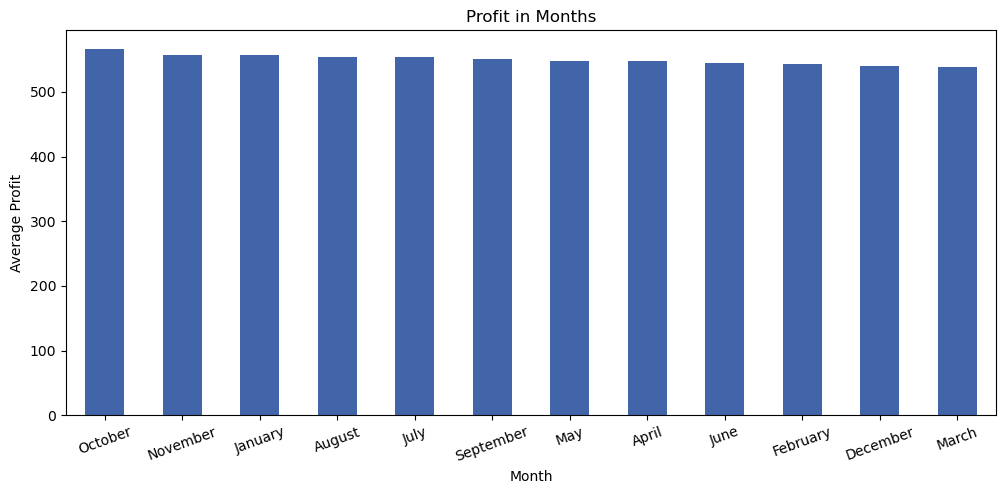

In [39]:
df.groupby(['month'])['net_profit'].mean().sort_values(ascending=False).plot(kind='bar',color='#4265AA',rot=20 ,figsize=(12,5))
plt.title("Profit in Months")
plt.xlabel('Month')
plt.ylabel('Average Profit')
plt.show()

* The profit seems to show some seasonal patterns. October, November, January have higher average revenues compared to other months.

### Profit by Week

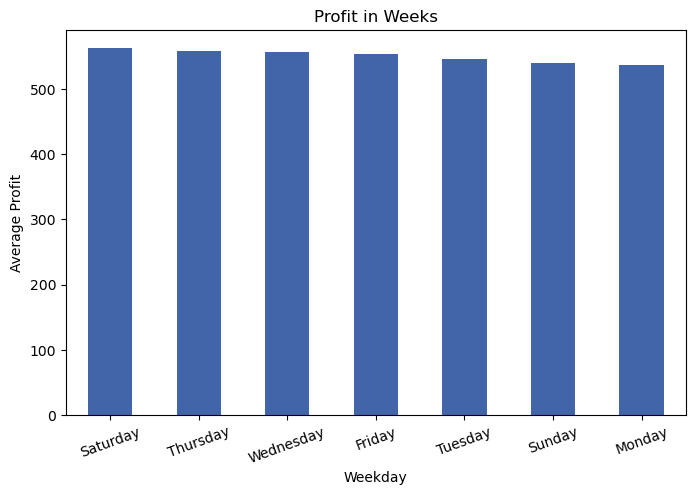

In [40]:
df.groupby(['day'])['net_profit'].mean().sort_values(ascending=False).plot(kind='bar',color='#4265AA',rot=20 ,figsize=(8,5))
plt.title("Profit in Weeks")
plt.xlabel('Weekday')
plt.ylabel('Average Profit')
plt.show()

*  Saturday have the highest average profit, with Saturday having the highest value. This suggests that weekends are strong sales days, possibly because more people have free time to shop or engage in leisure activities, leading to increased spending.Monday's relatively lower average revenue could be attributed to the start of the workweek. 

### Brand

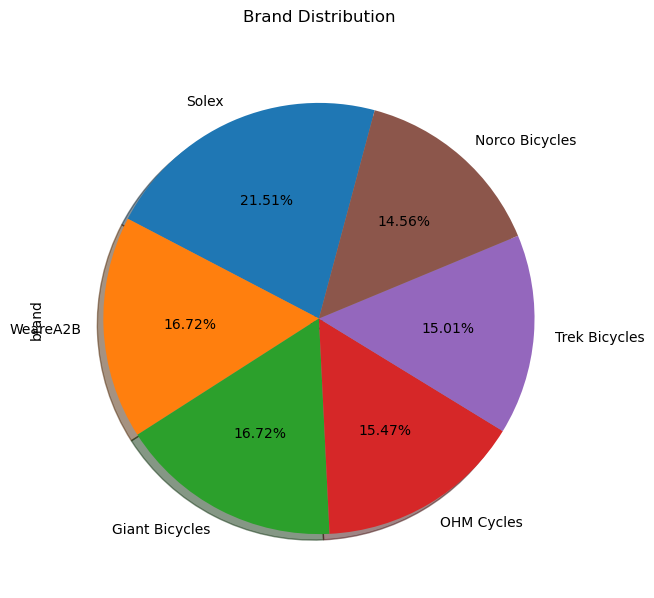

In [41]:
df.brand.value_counts().plot(kind='pie',shadow='True' ,autopct='%1.2f%%', startangle = 75,figsize=(7,7))
plt.title('Brand Distribution', loc='center', pad=20)
plt.gca().title.set_position([0.5, 1.1])
plt.show() 

* we can infer that "Solex" is the most popular brand, followed closely by "WeareA2B" and "Giant Bicycles.", "Solex" has the highest count suggests that it is the dominant brand in the dataset, with the highest number of bicycles sold or recorded transactions. It appears to have a significant market share compared to other brands.

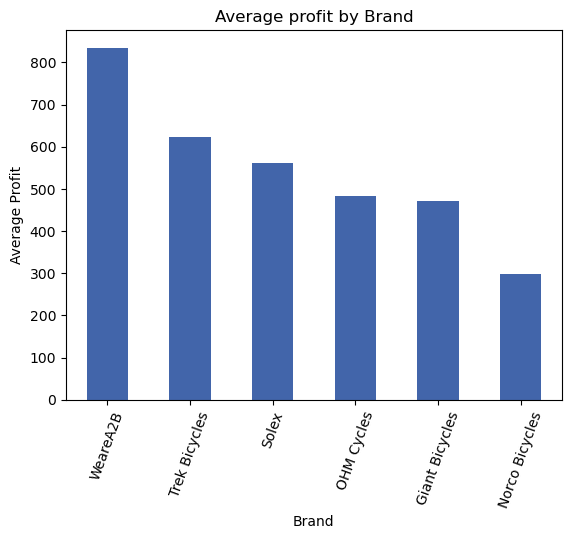

In [42]:
brand_avg_cost = df.groupby('brand')['net_profit'].mean()
sorted_brands = brand_avg_cost.sort_values(ascending=False)
ax = sorted_brands.plot(kind='bar', color='#4265AA',rot=70)
plt.xlabel('Brand')
plt.ylabel('Average Profit')
plt.title('Average profit by Brand')
plt.show()

* The highest average profit is associated with the brand "WeareA2B," while the lowest average profit is associated with the brand "Norco Bicycles."

### Product category

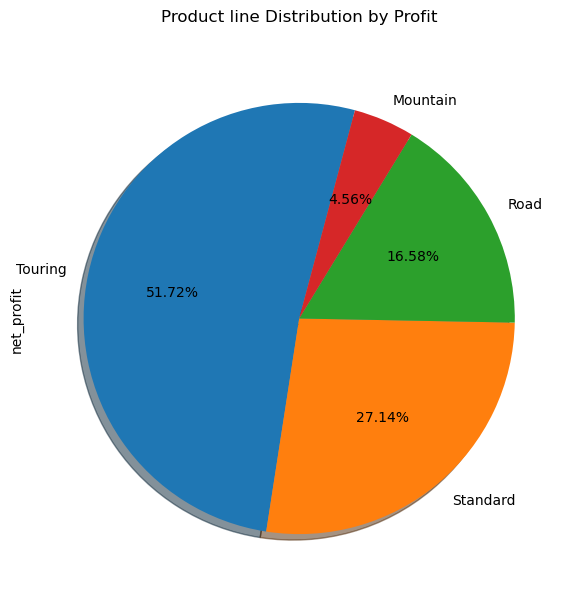

In [43]:
df.groupby(['product_line'])['net_profit'].mean().sort_values(ascending=False).plot(kind='pie',shadow='True' ,autopct='%1.2f%%', startangle = 75,figsize=(7,7))
plt.title('Product line Distribution by Profit', loc='center', pad=20)
plt.gca().title.set_position([0.5, 1.1])
plt.show() 

* "Touring" product line with the highest average profitability , "Standard" and "Road" product line fall in the mid-range profitability category.

### Product class

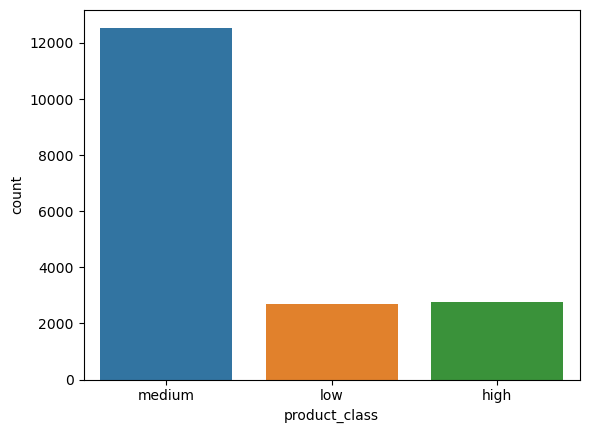

In [44]:
sns.countplot(data=df, x='product_class')
plt.show()

* The product class counts indicate the majority of products fall under the "medium" class, followed by "high" and "low" classes.the "medium" class has the highest count suggests that the company might primarily focus on offering products with medium-level features, specifications, and pricing. These products likely target a broad customer base.

### Product cost Distribution

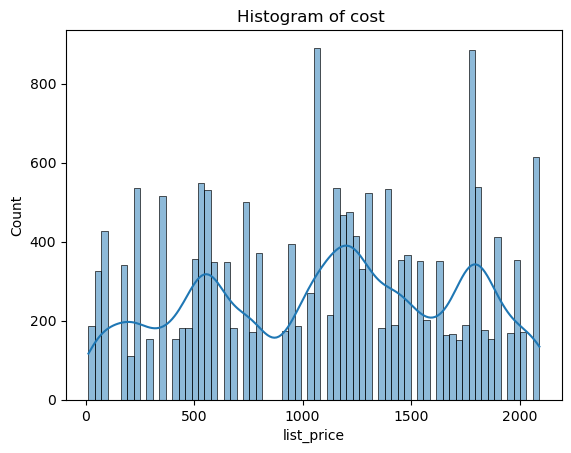

In [45]:
sns.histplot(data=df,x='list_price',kde=True,bins=70)
plt.title('Histogram of cost ')
plt.show()

* Cost distribution plot appears as multimodal distribution. suggest that there are different cost groups within the data.

### Top 10 products

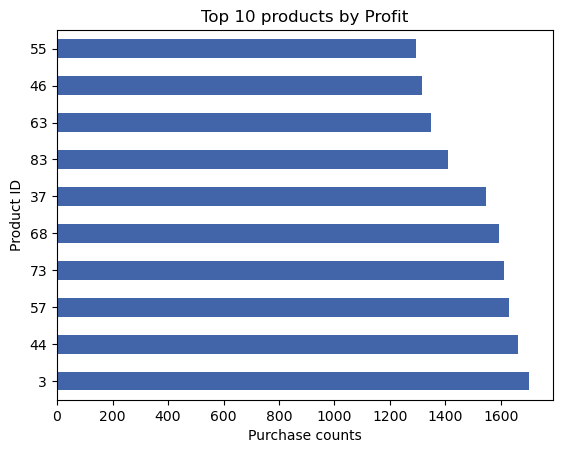

In [46]:
df.groupby(['product_id'])['net_profit'].mean().sort_values(ascending=False)[0:10].plot(kind='barh',color='#4265AA',rot=0)
plt.title("Top 10 products by Profit")
plt.ylabel('Product ID')
plt.xlabel('Purchase counts')
plt.show()

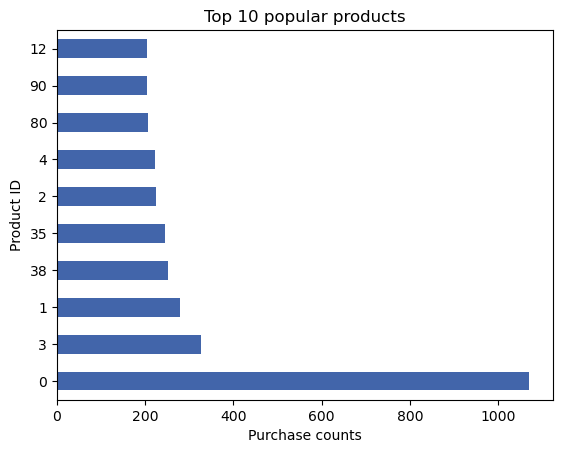

In [47]:
df.product_id.value_counts()[0:10].plot(kind='barh',color='#4265AA',rot=0)
plt.title("Top 10 popular products")
plt.ylabel('Product ID')
plt.xlabel('Purchase counts')
plt.show()

### State

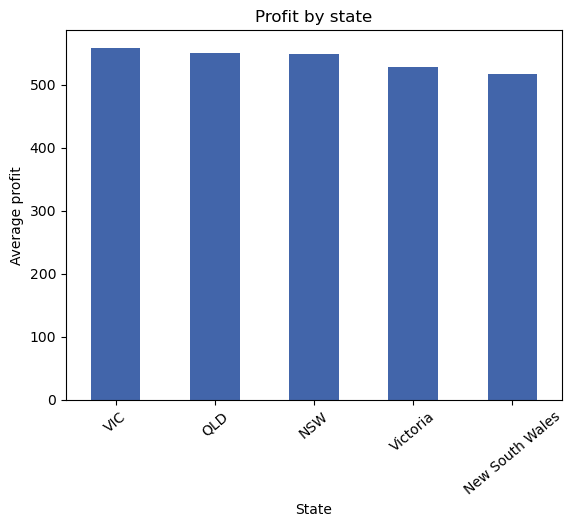

In [48]:
df.groupby(['state'])['net_profit'].mean().sort_values(ascending=False)[0:10].plot(kind='bar',color='#4265AA',rot=40)
plt.title("Profit by state")
plt.xlabel('State')
plt.ylabel('Average profit')
plt.show()

### Age

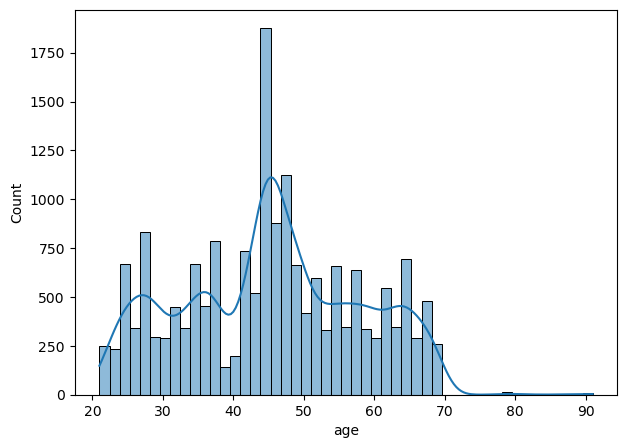

In [49]:
plt.figure(figsize=(7,5))
sns.histplot(data=df,x='age',kde=True)
plt.show()

* The highest counts seem to be in the mid to late 40s, with ages 45, 46, and 44 having the highest frequency.

### Gender distribution

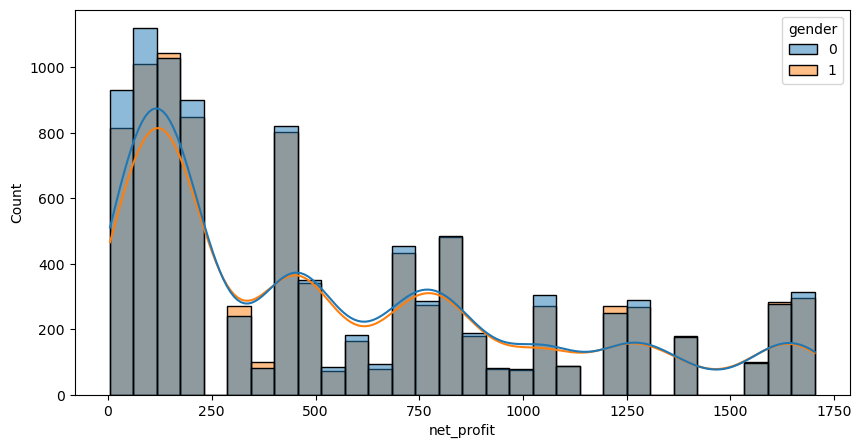

In [50]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='net_profit', kde=True, hue='gender', bins=30)
plt.show()

* It appears females are spending more

In [51]:
## Statistical summary of the data
df.describe().T.style.background_gradient(cmap='turbo')

,count,mean,std,min,25%,50%,75%,max
customer_id,18010.000000,1741.633093,1009.543491,1.000000,866.000000,1745.000000,2613.750000,3500.000000
postcode,18010.000000,2981.958801,851.958141,2000.000000,2197.500000,2765.500000,3677.000000,4883.000000
property_valuation,18010.000000,7.544531,2.817341,1.000000,6.000000,8.000000,10.000000,12.000000
gender,18010.000000,0.489617,0.499906,0.000000,0.000000,0.000000,1.000000,1.000000
past_3_years_bike_related_purchases,18010.000000,48.767074,28.708158,0.000000,24.000000,48.000000,73.000000,99.000000
tenure,18010.000000,10.678345,5.675208,1.000000,6.000000,11.000000,15.000000,22.000000
transaction_id,18010.000000,9971.794003,5771.102085,1.000000,4977.250000,9954.500000,14958.750000,20000.000000
product_id,18010.000000,45.741810,30.564734,0.000000,18.000000,45.000000,72.000000,100.000000
online_order,18010.000000,0.499389,0.500014,0.000000,0.000000,0.000000,1.000000,1.000000
list_price,18010.000000,1105.332062,583.564003,12.010000,575.270000,1163.890000,1577.530000,2091.470000


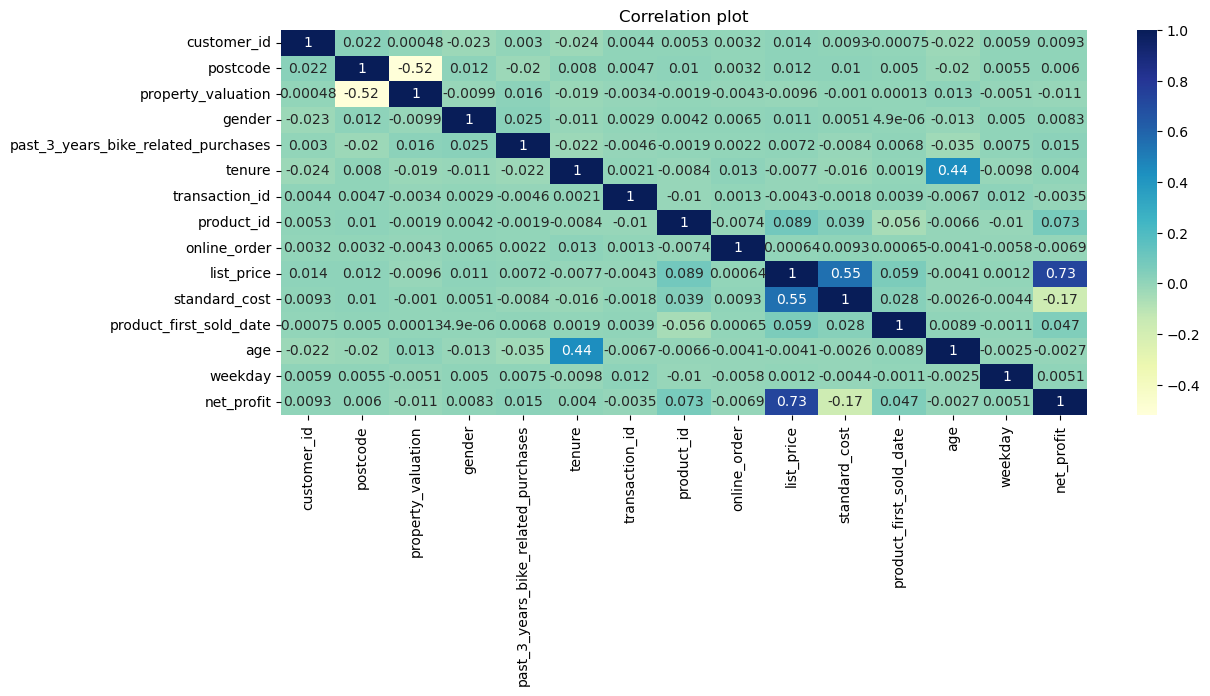

In [52]:
plt.figure(figsize=(13,5))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation plot")
plt.show()

### Customer & Transaction summary across different states

In [54]:
customer_state_summary = df.groupby('state').agg(Profit=('net_profit', 'sum'),Customers=('customer_id', 'nunique'),
                                                Transactions=('transaction_id', 'nunique')).reset_index()
customer_state_summary['Average Customer Spend'] = round(customer_state_summary['Profit'] / customer_state_summary['Customers'], 2)
customer_state_summary['Average Order Value'] = round(customer_state_summary['Profit'] / customer_state_summary['Transactions'], 2)
customer_state_summary = customer_state_summary.sort_values(by='Profit', ascending=False)
customer_state_summary

,state,Profit,Customers,Transactions,Average Customer Spend,Average Order Value
0,NSW,5079772.42,1658,9248,3063.80,549.28
3,VIC,2281323.19,737,4083,3095.42,558.74
2,QLD,2099717.59,683,3812,3074.26,550.82
1,New South Wales,236771.30,84,458,2818.71,516.97
4,Victoria,216295.61,72,409,3004.11,528.84


In [55]:
df['transaction_date'] = pd.to_datetime(df['transaction_date']) 
last_date = df['transaction_date'].max()
customer_summary = df.groupby('customer_id').agg(n_purchase=('transaction_id', 'nunique'),
                                                             min_purchase=('net_profit', 'min'),
                                                             avg_purchase=('net_profit', 'mean'),
                                                             max_purchase=('net_profit', 'max'),
                                                             total_purchase=('net_profit', 'sum'),
                                                             first_purchase=('transaction_date', 'min'),
                                                             last_purchase=('transaction_date', 'max')).reset_index()

customer_summary['first_purchase'] = (last_date - customer_summary['first_purchase']).dt.days
customer_summary['last_purchase'] = (last_date - customer_summary['last_purchase']).dt.days


customer_product_cat = df.pivot_table(index='customer_id', columns='product_line', values='net_profit', fill_value=0, aggfunc='sum').reset_index()

customer_summary = pd.merge(customer_summary, customer_product_cat, on='customer_id', how='left')

##### *Summary of each customer purchase history*

In [56]:
display(customer_summary.head(10))
print("size :", customer_summary.shape)

,customer_id,n_purchase,min_purchase,avg_purchase,max_purchase,total_purchase,first_purchase,last_purchase,Mountain,Road,Standard,Touring
0,1,11,17.87,274.371818,751.02,3018.09,359,7,75.75,973.76,1968.58,0.00
1,2,3,448.68,742.086667,1230.30,2226.26,240,128,0.00,0.00,2226.26,0.00
2,4,2,41.13,110.285000,179.44,220.57,271,195,0.00,0.00,220.57,0.00
3,5,6,75.48,399.156667,1230.27,2394.94,302,16,75.75,514.30,1804.89,0.00
4,6,5,57.73,789.310000,1660.88,3946.55,336,64,0.00,0.00,3946.55,0.00
5,7,3,15.08,73.370000,114.93,220.11,315,253,114.93,0.00,105.18,0.00
6,8,9,128.46,596.043333,1702.55,5364.39,360,22,0.00,309.81,3749.33,1305.25
7,9,6,91.15,392.185000,751.02,2353.11,329,78,0.00,198.22,2154.89,0.00
8,11,5,133.78,618.312000,1103.43,3091.56,272,46,0.00,0.00,884.70,2206.86
9,12,7,25.09,505.718571,1660.88,3540.03,321,67,0.00,309.81,3230.22,0.00


size : (3234, 12)


# Customer Segmentation

## K-means algorithm

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA


In [58]:
# Scaling Data
scaled_customer_summary = StandardScaler().fit_transform(customer_summary)

# Convert the scaled data to a DataFrame
scaled_data = scaled_customer_summary.copy()

In [59]:
inertia_values = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

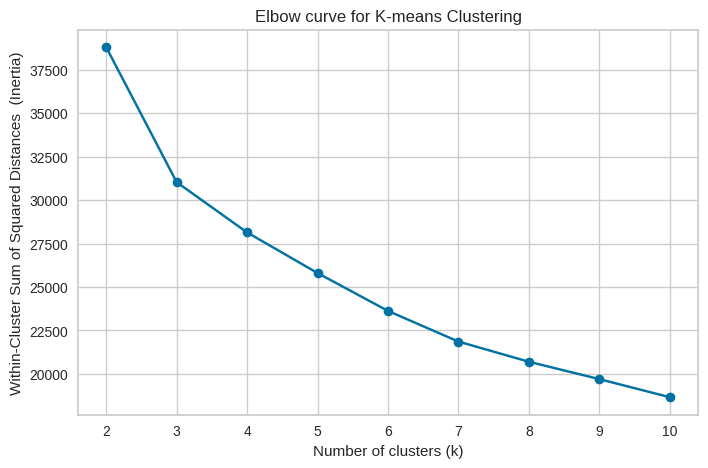

In [60]:
plt.figure(figsize=(8,5))
plt.plot(range(2,11), inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squared Distances  (Inertia)')
plt.title('Elbow curve for K-means Clustering')
plt.xticks(range(2,11))
plt.grid(True)
plt.show()

* The elbow plot shows that the optimal number of clusters is 3. Therefore, we should choose k=3.

In [61]:
silhouette_scores = []

for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

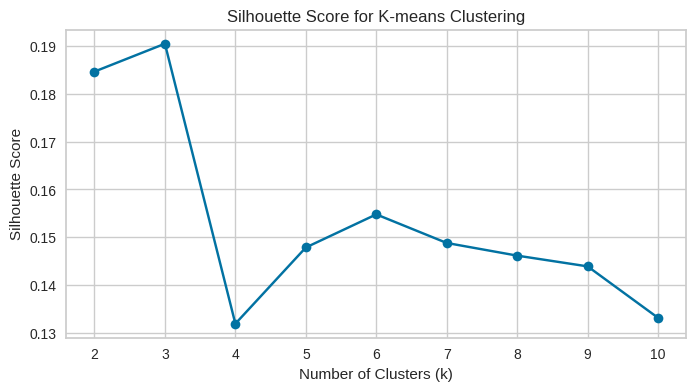

In [62]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means Clustering')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

* A silhouette score of 0.19 indicates that the clusters formed when using k=3 are somewhat well-separated. The data points within each cluster are relatively close to each other, and there is a moderate degree of separation between clusters. The silhouette coefficient is maximized at k=3, indicating that this is the optimal number of clusters.

##### * Based on the two methods we have used, the optimal number of clusters is 3. So let’s choose k=3.

In [63]:
np.random.seed(123)

# Computing k-means with 3 clusters and 10 random initializations
km_model = KMeans(n_clusters=3, n_init=10)
km_model.fit(scaled_data)

customer_summary['Cluster'] = km_model.labels_

#### Is the clustering algorithm working as expected ?

Due to the high dimensionality of our dataset (12 variables), it is not possible to visualize all clusters in a way that is easy to interpret. readable visualizations are restricted to a maximum of 3 dimensions

In [64]:
pca = PCA()
pca.fit(scaled_data)
explained_variances = pca.explained_variance_

We doesn't specify the number of components explicitly. By default, without specifying the n_components parameter, PCA retains all the components, which means the output will have the same number of dimensions as the input data.

A scree plot is a graphical representation, to help determine the number of meaningful components or factors in a dataset. The scree plot helps in deciding how many principal components should be retained for further analysis.

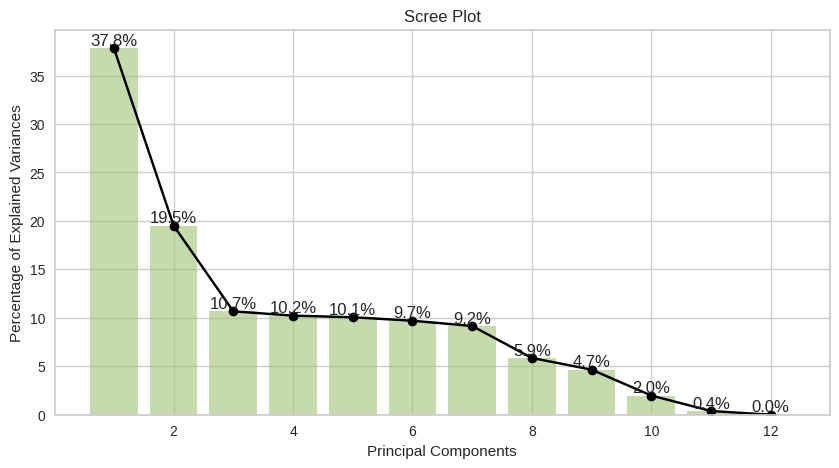

In [65]:
num_components = len(explained_variances)
x = np.arange(1, num_components + 1) 

plt.figure(figsize=(10, 5))
plt.plot(x, explained_variances*10, marker='o', linestyle='-', color='black', label='Explained Variance Percentage')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained Variances')
plt.title('Scree Plot')
plt.grid(True)

plt.bar(x, explained_variances*10, color='g', alpha=0.6)

for i, explained_var in enumerate(explained_variances):
    plt.text(x[i], explained_var*10, f'{explained_var*10:.1f}%', ha='center', va='bottom')


##### *let's visualize the distribution of clusters by plotting the first two PCA components, as well as the first and third PCA components.*

pca = PCA(n_components=k) is a way to perform dimensionality reduction and project the data into a lower-dimensional space. By setting n_components=k, you will obtain a transformed dataset with two dimensions, which are the first k principal components that capture the most significant variance in the original data.

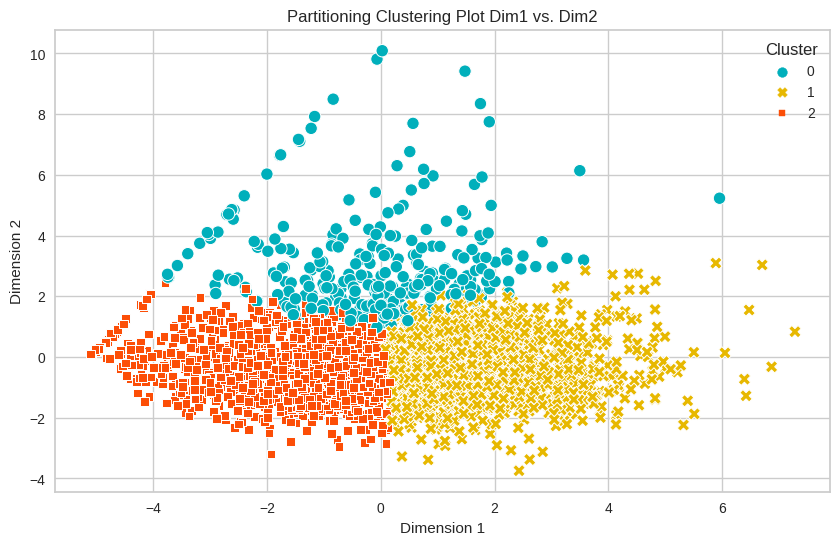

In [66]:
cluster_labels = km_model.labels_

# Extract the first two principal components 
pca1 = PCA(n_components=2)
pca_result = pca1.fit_transform(scaled_data)

# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels,
                palette=["#00AFBB", "#E7B800", "#FC4E07"], style=cluster_labels, s=80)
plt.title("Partitioning Clustering Plot Dim1 vs. Dim2")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


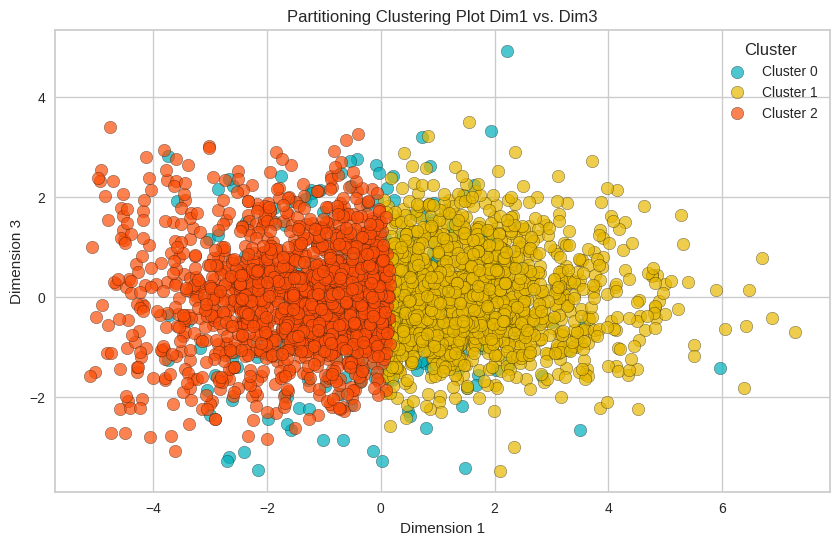

In [67]:
cluster_labels = km_model.labels_

# Perform PCA to reduce data to 2 dimensions for visualization
pca2 = PCA(n_components=3)
pca_result = pca2.fit_transform(scaled_data)

# scatter plot
plt.figure(figsize=(10, 6))

# Customizing the palette with colors for each cluster
palette = ["#00AFBB", "#E7B800", "#FC4E07"]

for cluster_id in np.unique(cluster_labels):
    cluster_indices = cluster_labels == cluster_id
    plt.scatter(pca_result[cluster_indices, 0], pca_result[cluster_indices, 2],
                label=f'Cluster {cluster_id}', color=palette[cluster_id],
                alpha=0.7, edgecolors='k', s=80)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 3')
plt.title('Partitioning Clustering Plot Dim1 vs. Dim3')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

The plots above clearly show that the three clusters are well-separated, with no overlap. We are satisfied with this result and can now move on to the next part of our analysis.

## RFM Analysis: (Recency, Frequency, Monetary)

RFM is a customer segmentation technique that uses three quantitative factors to identify a company's or organization's best customers: recency, frequency, and monetary value.

* Recency: This refers to how recently a customer has made a purchase. Customers who have made a purchase recently are more likely to make another purchase in the near future.
* Frequency: This refers to how often a customer makes a purchase. Customers who make purchases more often are more likely to be loyal customers.
* Monetary value: This refers to how much money a customer spends on purchases. Customers who spend more money are more valuable to a company.


In [68]:
# we will groupby our customer_order_summary data according to cluster formed in Kmeans algorithm
cluster_diff = customer_summary.groupby('Cluster').agg(**{
        'Number of Customers': ('Cluster', 'size'),
        'Recency Mean': ('last_purchase', 'mean'),
        'Frequency Mean': ('n_purchase', lambda x: round(x.mean())),
        'Monetary Value Mean': ('total_purchase', lambda x: round(x.mean())),
        'Cluster Revenue': ('total_purchase', 'sum')
    }).reset_index()

cluster_diff

,Cluster,Number of Customers,Recency Mean,Frequency Mean,Monetary Value Mean,Cluster Revenue
0,0,323,95.238390,3,2751,888430.45
1,1,1368,45.483187,7,4612,6308866.48
2,2,1543,71.975373,5,1761,2716583.18


It is important to examine the distribution of each variable within each cluster. Boxplots are a useful tool for visualizing the distributions of variables. Here, we use boxplots to analyze the distributions of Recency, Frequency and Monetary in each of the three clusters.

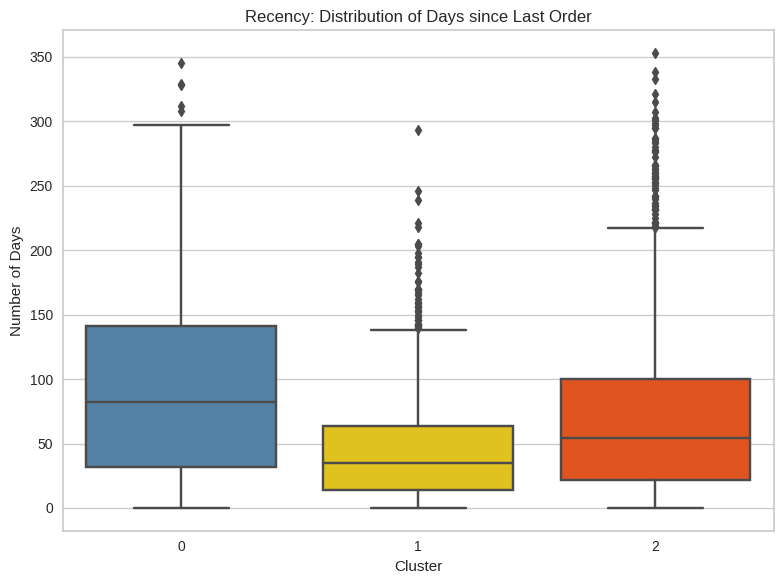

In [69]:
# Recency: Distribution of Days since Last Order
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='last_purchase', data=customer_summary,
            palette=["steelblue", "gold", "orangered"])
plt.xlabel('Cluster')
plt.ylabel('Number of Days')
plt.title('Recency: Distribution of Days since Last Order')
plt.tight_layout()
plt.show()                                                                              #

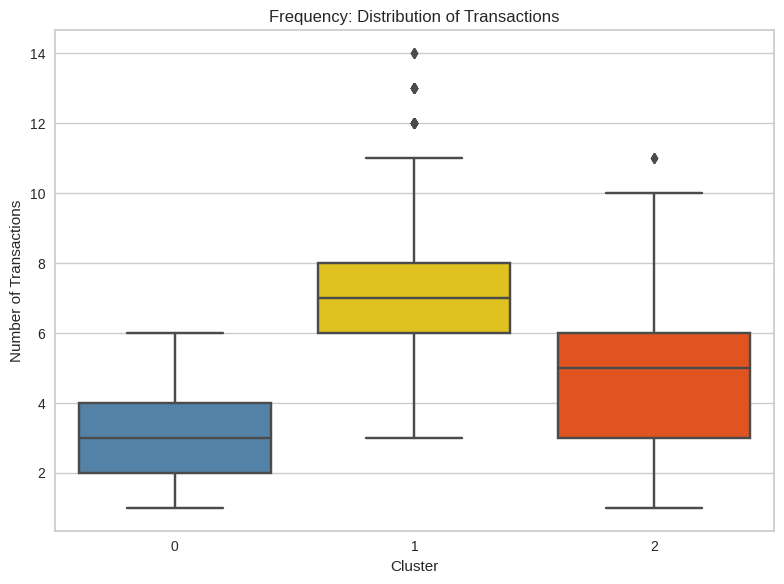

In [70]:
# Frequency: Distribution of Transactions
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='n_purchase', data=customer_summary,
            palette=["steelblue", "gold", "orangered"])
plt.xlabel('Cluster')
plt.ylabel('Number of Transactions')
plt.title('Frequency: Distribution of Transactions')
plt.tight_layout()
plt.show()                                                                              #

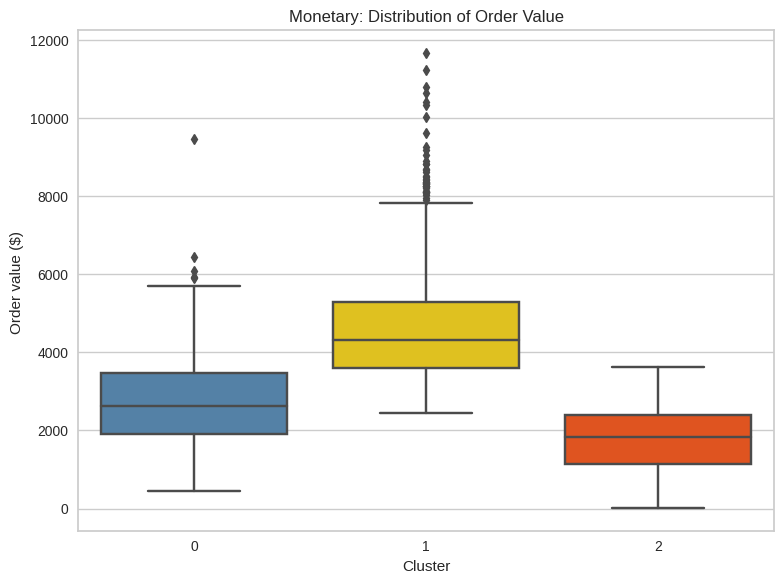

In [71]:
# Monetary: Distribution of Order Value
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='total_purchase', data=customer_summary,
            palette=["steelblue", "gold", "orangered"])
plt.xlabel('Cluster')
plt.ylabel('Order value ($) ')
plt.title('Monetary: Distribution of Order Value')
plt.tight_layout()
plt.show()                                                                              #

The summary highlights a few simple characteristics that distinguish customers in each cluster.

#### Cluster 0 (Blue):
* These people are finally shopping after a long hiatus. on average takes 3 months before their next purchase
* These customers are infrequent shoppers. These people don't even shop very often.
* Is not a heavy spender, but does spend a reasonable amount on each purchase, with an average of $2633.95 . Is not a budget shopper, but does not spend lavishly either.


#### Cluster 1 (Golden):
* They order monthly on average
* The customer have been engaging with the company's products and services more than any other group of customer in the recent past.
* These people make purchases on a more regular basis.
* These people are not infrequent shoppers have a higher shopping rate.
* These customers have the highest monetary value.
* Spends a large amount of money on each purchase, with an average of $4316.545 . this group Is not a budget shopper.


#### Cluster 2 (Orange):
* These people are excited to be shopping again after a long time, takes 2 months before thier next purchase.
* These customers are not very  frequent buyers and Yet, these customer buy more often than others.
* Has a spending habit that falls somewhere in the low of the spectrum, with an average purchase amount $1844.56 .

#### Products that are in demand by each cluster.

We will focus on a few product categories that have the potential to increase sales within each cluster and across all three clusters.

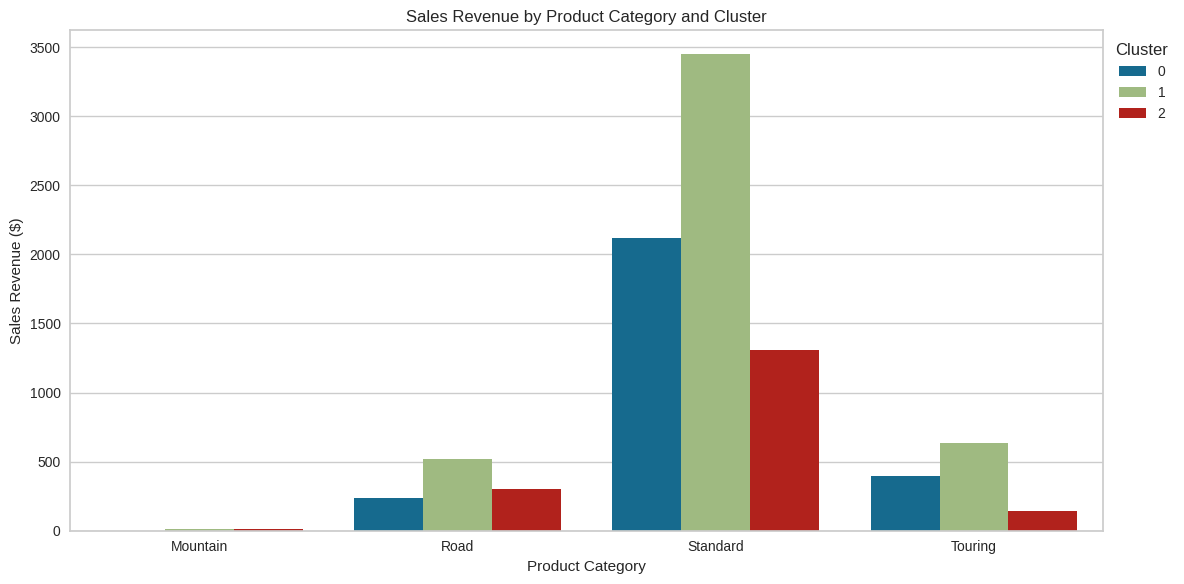

In [72]:
product_stats_cluster = customer_summary.drop(columns=['customer_id', 'n_purchase', 'min_purchase', 'avg_purchase', 'max_purchase',
                                                            'total_purchase', 'first_purchase', 'last_purchase'])
product_stats_cluster = pd.melt(product_stats_cluster, id_vars=['Cluster'], var_name='ProductLine', value_name='PurchaseValue')

plt.figure(figsize=(12, 6))
sns.barplot(data=product_stats_cluster, x='ProductLine', y='PurchaseValue', hue='Cluster',ci=None)
plt.xlabel('Product Category')
plt.ylabel('Sales Revenue ($)')
plt.title('Sales Revenue by Product Category and Cluster')
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The bar plots above summarize the purchasing behavior in a specific category.


#### Cluster 0:
* Standard Producline are the most popular category for customer spending.
* Productline Road followed by Touring is the least popular category for customer spending.

#### Cluster 1:
* Customers spend a significant amount of money Productline Standard.
* Customers spend less money on jewellery than on Productline Road and Touring.

#### Cluster 2:
* Customers spend the most money on Productline Standard.
* Productline Touring is not a high-demand category for customers. Least sales revenue from Productline Road and Touring.

## How can we use the results for targeted marketing?

We have successfully clustered our customers based on their purchase behavior. We have found meaningful factors for each cluster. The next step is to develop specific interactions for each cluster.

Here are some potential solutions:

1. For Cluster 0, These customers are making their purchase in a long time and they typically make a purchase every 3 months.
Since these customers are returning after a long absence. Whatever the reason, it is important to welcome these customers back and encourage them to make another purchase. By sending them a welcome back email, Offering them a special discount or promotion. Sending them personalized emails based on their past purchase history.

2. For Cluster 1, These customers typically place an order once a month. we will attract such customers more by offering them a loyalty program, personalizing marketing messages, offering exclusive content or discounts, making it easy to shop with company, and providing excellent customer service, company can show them that you're the best choice for their monthly purchases offer subscription plans with benefits.

3. For Cluster 2,They typically make a purchase every 2 months. These customers are dormant customers who are finally starting to shop again. Some reasons why these customers might be excited to be shopping again. They may have been waiting for a specific product to become available. They may have been dissatisfied with their previous purchases and have been looking forward to trying something new.it is important to encourage these customers to make another purchase by sending targeted promotions based on their previous purchases and preferences.Suggest complementary or upgraded products to enhance their experience.Create a sense of urgency with time-sensitive offers or discounts. Offer top-notch support to create a positive impression and encourage repeat business.

### Conclusion

In conclusion, we were able to obtain valuable information about our clients by answering a few questions about the data and applying popular clustering methods. 
##### *We can use this strategy to attract new customers who will be valuable to the organization.*

In this analysis we analyzed sales trends, brand popularity, market profatibility, product categories, demographic distribution through exploratory data analysis. We create dataframe to summarize customer transactions by state. We create dataframe to summarize each customer purchase history. This dataframe was used to perform customer segmentation. For customer segmentation we use k-means clustering algorithm. the clusters obtained from the clustering algorithms provided us with valuable insights into our customers' shopping behaviors. This information helped us to improve our product offerings, target our marketing campaigns more effectively, and in the future, it will improve effectiveness of marketing by managing resources wisely.